In [23]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('..')
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from src.model.HMM.HMM import HMM
from src.model.HMM.data import train_test_split, get_dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
curr_dir = os.getcwd()
exe_path = 'data/processed/exe.csv'
path = os.path.join(curr_dir, exe_path)
X, y = get_dataset(exe_path)
X_train, y_train, X_test, y_test = train_test_split(X, y)
model = HMM()
model.fit(X_train, y_train)

In [3]:
cts = model.get_counts_matrix()
cts = sorted(cts.items(), key = lambda x: x[1], reverse = True)
top_10 = cts[:11]
del top_10[6] # Delete ApplicationFrameHost.exe
top_10_list = [x[0] for x in top_10]

In [25]:
import numpy as np
z = np.array([1,1,1])
x = np.array([[1,3,1], [0,0,-1], [-1,-1,1]])
alpha = np.array([0.5, 0, -0.25])
gamma = 0.25
res = 0
for i in range(len(z)):
    temp_res = alpha[i] * np.exp(-gamma * np.linalg.norm(x[i] - z))
    res += temp_res
    print(res, temp_res)
print(res.round(2))

0.3032653298563167 0.3032653298563167
0.3032653298563167 0.0
0.17999815700750676 -0.12326717284880995
0.18


In [4]:
t = model.get_transition_matrix()

In [5]:
most_frequent_apps = dict()
for exe in top_10_list:
    top_4_prob = []
    i = 0
    for p in t[exe].items():
        if i == 4:
            break
        top_4_prob.append(p)
        i += 1
    most_frequent_apps[exe] = dict(top_4_prob)

In [6]:
y_axis = set([y for x in most_frequent_apps.values() for y in x.keys()])
x_axis = most_frequent_apps.keys()

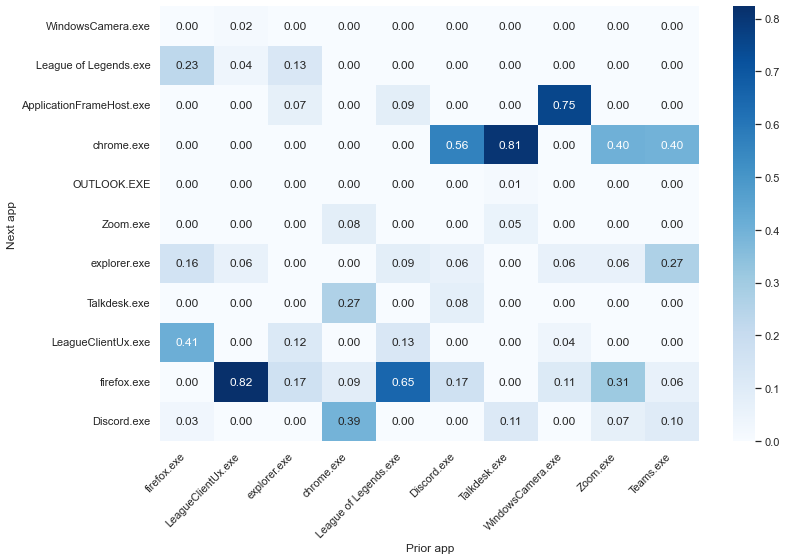

In [26]:
df = pd.DataFrame(index = y_axis, data = most_frequent_apps)
df = df.fillna(0)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(df, cmap = 'Blues', annot=True, fmt='.2f')
x_labels = ax.get_xticklabels()
plt.setp(x_labels, rotation=45, horizontalalignment='right')
plt.xlabel('Prior app')
plt.ylabel('Next app')
plt.subplots_adjust(left=0.1, bottom=0.15)
plt.show()

In [8]:
for exe, probs in t.items():
    t[exe]['max_prob'] = max(probs.values())
t_sorted = sorted(t.items(), key = lambda x: x[1]['max_prob'], reverse=True)
for app, prob in t_sorted:
   del prob['max_prob']

In [22]:
[t_sorted[z][0] for z in range(10)]

['vpndownloader.exe',
 'Yakuza0.exe',
 'LeagueCrashHandler.exe',
 '7zFM.exe',
 'Shell_TrayWnd',
 'Chrome_WidgetWin_1',
 'ToolbarWindow32',
 'Button',
 '#32768',
 '#32770']

In [17]:
list(most_frequent_apps2.keys())

['Yakuza0.exe',
 'LeagueCrashHandler.exe',
 '7zFM.exe',
 'iCloudServices.exe',
 'RiotClientServices.exe',
 'JustCause3.exe',
 'Microsoft.Photos.exe',
 'vlc.exe',
 'Talkdesk.exe',
 'WindowsCamera.exe']

In [9]:
x_axis2 = [
    'Yakuza0.exe',
    'LeagueCrashHandler.exe',
    '7zFM.exe',
    'iCloudServices.exe',
    'RiotClientServices.exe',
    'JustCause3.exe',
    'Microsoft.Photos.exe',
    'vlc.exe',
    'Talkdesk.exe',
    'WindowsCamera.exe',
]

In [10]:
most_frequent_apps2 = dict()
for exe in x_axis2:
    top_4_prob = []
    i = 0
    for p in t[exe].items():
        if i == 4:
            break
        top_4_prob.append(p)
        i += 1
    most_frequent_apps2[exe] = dict(top_4_prob)
y_axis2 = set([y for x in most_frequent_apps2.values() for y in x.keys()])

In [11]:
df2 = pd.DataFrame(index = y_axis2, data = most_frequent_apps2)
df2 = df2.fillna(0)
df2

,Yakuza0.exe,LeagueCrashHandler.exe,7zFM.exe,iCloudServices.exe,RiotClientServices.exe,JustCause3.exe,Microsoft.Photos.exe,vlc.exe,Talkdesk.exe,WindowsCamera.exe
obs64.exe,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.142857,0.000000,0.000000
<s>,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
StartMenuExperienceHost.exe,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
Microsoft.AAD.BrokerPlugin.exe,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
ApplicationFrameHost.exe,0.0,0.0,0.0,0.0,0.0,0.0,0.870968,0.000000,0.000000,0.753968
LeagueClientUx.exe,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.039683
chrome.exe,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.805369,0.000000
ShellExperienceHost.exe,0.0,0.0,0.0,0.0,0.0,0.0,0.032258,0.000000,0.000000,0.000000
OUTLOOK.EXE,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.013423,0.000000
Zoom.exe,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.053691,0.000000


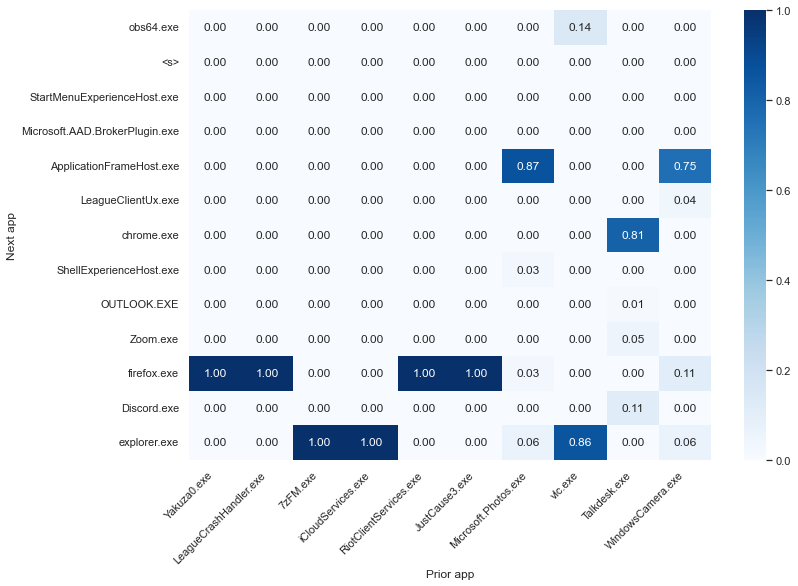

In [12]:
df2 = pd.DataFrame(index = y_axis2, data = most_frequent_apps2)
df2 = df2.fillna(0)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(df2, cmap = 'Blues', annot=True, fmt='.2f')
x_labels = ax.get_xticklabels()
plt.setp(x_labels, rotation=45, horizontalalignment='right')
plt.xlabel('Prior app')
plt.ylabel('Next app')
plt.show()

### Top-1 accuracy

In [13]:
pred_1 = model.predict(X_test)
accuracy_1 = model.evaluate(pred_1, y_test)
accuracy_1

0.4821973550356053

### Top-2 accuracy

In [14]:
pred_2 = model.predict(X_test, top=2)
accuracy_2 = model.evaluate(pred_2, y_test)
accuracy_2

0.659206510681587

### Top-3 accuracy

In [15]:
pred_3 = model.predict(X_test, top=3)
accuracy_3 = model.evaluate(pred_3, y_test)
accuracy_3

0.7558494404883012